In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../Data/ecom_sales_data.csv', encoding='ISO-8859-1')
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.shape

(9994, 21)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [11]:
df.isnull().sum()
(df.isnull().sum() / len(df)) * 100


row_id           0.0
order_id         0.0
order_date       0.0
ship_date        0.0
ship_mode        0.0
customer_id      0.0
customer_name    0.0
segment          0.0
country          0.0
city             0.0
state            0.0
postal_code      0.0
region           0.0
product_id       0.0
category         0.0
sub-category     0.0
product_name     0.0
sales            0.0
quantity         0.0
discount         0.0
profit           0.0
dtype: float64

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['quantity'] = df['quantity'].astype(int)


In [13]:
df.dtypes


row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date                object
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub-category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

In [14]:
df['ship_date'] = pd.to

AttributeError: module 'pandas' has no attribute 'to'

In [ ]:
df['ship_date'] = pd.to_datetime(df['ship_date'])


49

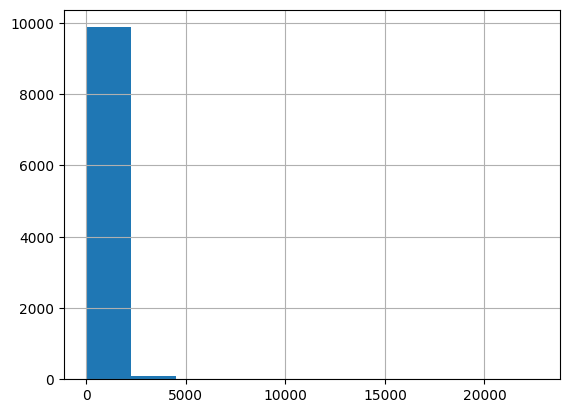

In [ ]:
df['category'].value_counts()
df['profit'].describe()
df['sales'].hist()
df['state'].nunique()


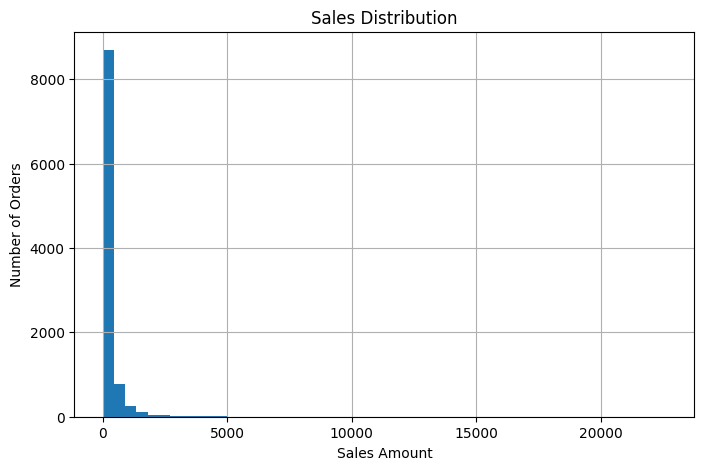

In [ ]:
df['sales'].hist(bins=50, figsize=(8,5))
plt.title('Sales Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


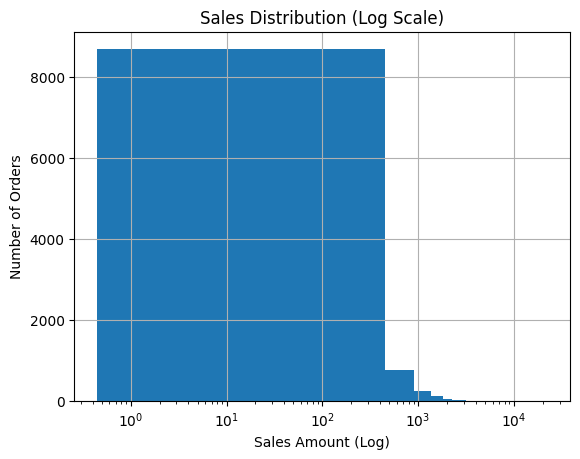

In [ ]:
import numpy as np
df['sales'].hist(bins=50)
plt.xscale('log')
plt.title('Sales Distribution (Log Scale)')
plt.xlabel('Sales Amount (Log)')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


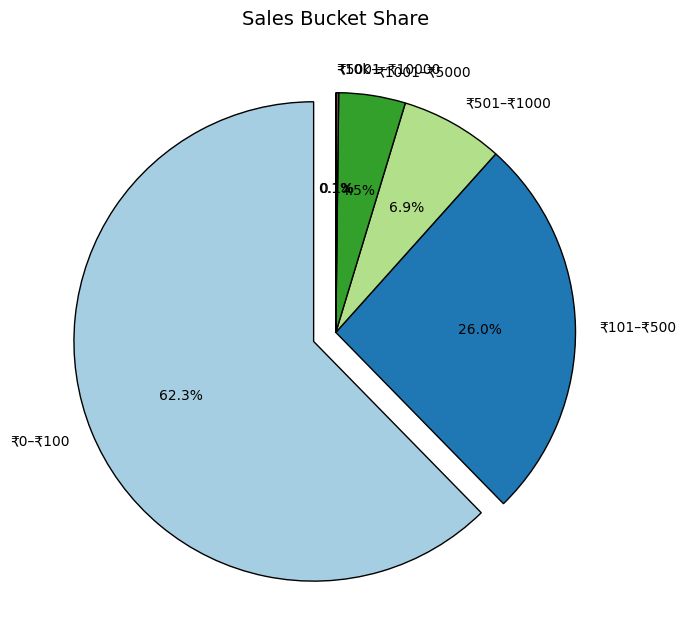

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define bins (sales ranges)
bins = [0, 100, 500, 1000, 5000, 10000, float('inf')]
labels = ['₹0–₹100', '₹101–₹500', '₹501–₹1000', '₹1001–₹5000', '₹5001–₹10000', '₹10k+']

# Create a new column for sales clusters
df['sales_bucket'] = pd.cut(df['sales'], bins=bins, labels=labels)

# Count how many orders fall into each cluster
sales_bucket_counts = df['sales_bucket'].value_counts().sort_index()

# 🔷 BAR CHART WITH LABELS
# Explode the largest bucket for better visibility
explode = [0.1 if i == sales_bucket_counts.idxmax() else 0 for i in sales_bucket_counts.index]

# Pie chart with better spacing and separation
sales_bucket_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    figsize=(7, 7),
    colors=plt.cm.Paired.colors,
    labeldistance=1.1,      # Push labels out slightly
    wedgeprops={'edgecolor': 'black'}  # Add border around slices
)

plt.title('Sales Bucket Share', fontsize=14)
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()







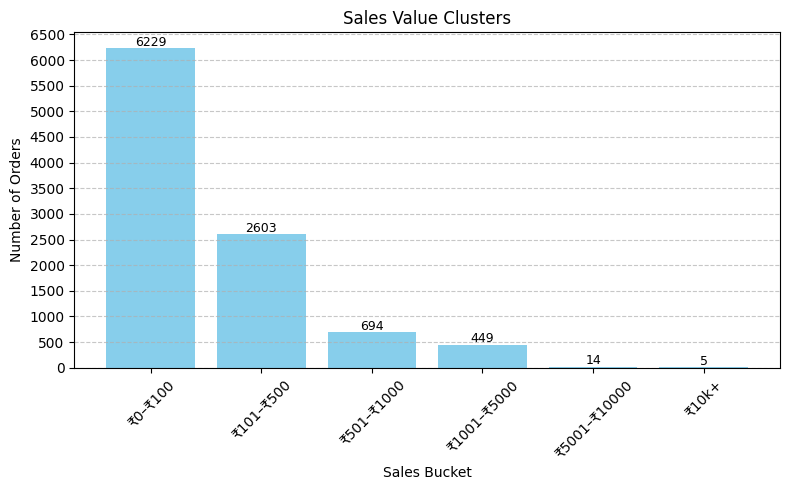

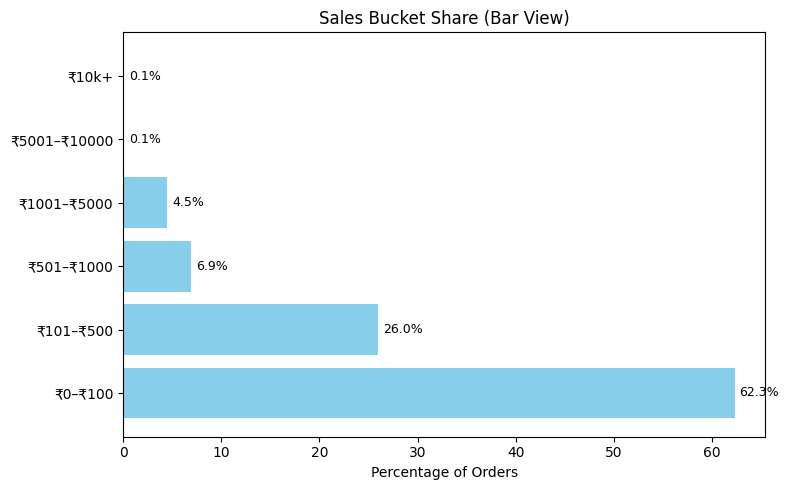

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define bins (sales ranges)
bins = [0, 100, 500, 1000, 5000, 10000, float('inf')]
labels = ['₹0–₹100', '₹101–₹500', '₹501–₹1000', '₹1001–₹5000', '₹5001–₹10000', '₹10k+']

# Create a new column for sales clusters
df['sales_bucket'] = pd.cut(df['sales'], bins=bins, labels=labels)

# Count how many orders fall into each cluster
sales_bucket_counts = df['sales_bucket'].value_counts().sort_index()

# ------------------------------------
# 📊 BAR CHART WITH VALUE LABELS
# ------------------------------------
plt.figure(figsize=(8, 5))
bars = plt.bar(sales_bucket_counts.index, sales_bucket_counts.values, color='skyblue')

# Titles & labels
plt.title('Sales Value Clusters')
plt.xlabel('Sales Bucket')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, sales_bucket_counts.max() + 500, 500))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# ------------------------------------
# 🥧 PIE CHART WITH EXPLODE AND CLEAN LABELS
# ------------------------------------
# Explode the largest bucket (visually highlight it)
explode = [0.1 if i == sales_bucket_counts.idxmax() else 0 for i in sales_bucket_counts.index]

# Plot the pie chart
# Horizontal bar chart with % share
share_pct = (sales_bucket_counts / sales_bucket_counts.sum() * 100).round(1)

plt.figure(figsize=(8, 5))
bars = plt.barh(share_pct.index, share_pct.values, color='skyblue')

for i, v in enumerate(share_pct):
    plt.text(v + 0.5, i, f"{v}%", va='center', fontsize=9)

plt.xlabel('Percentage of Orders')
plt.title('Sales Bucket Share (Bar View)')
plt.tight_layout()
plt.show()


In [19]:
df['profit'] = df['sales'] - df['cost']  # if cost is available


KeyError: 'cost'

In [20]:
print(df.columns)


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'sales_bucket'],
      dtype='object')


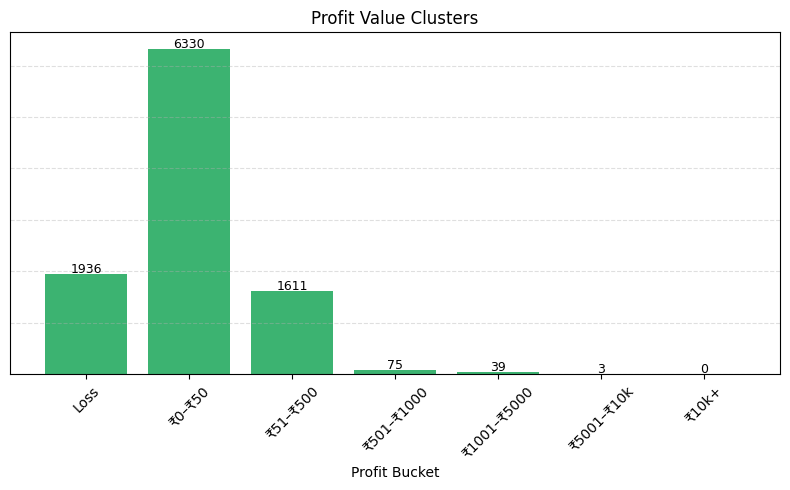

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define profit ranges
profit_bins = [-float('inf'), 0, 50, 500, 1000, 5000, 10000, float('inf')]
profit_labels = ['Loss', '₹0–₹50', '₹51–₹500', '₹501–₹1000', '₹1001–₹5000', '₹5001–₹10k', '₹10k+']

# Create profit bucket column
df['profit_bucket'] = pd.cut(df['profit'], bins=profit_bins, labels=profit_labels)

# Count per bucket
profit_bucket_counts = df['profit_bucket'].value_counts().sort_index()

# 📊 BAR CHART ONLY
plt.figure(figsize=(8, 5))
bars = plt.bar(profit_bucket_counts.index, profit_bucket_counts.values, color='mediumseagreen')

# Chart formatting
plt.title('Profit Value Clusters')
plt.xlabel('Profit Bucket')
plt.ylabel('')  # ✅ Remove y-axis label
plt.xticks(rotation=45)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)  # ✅ Remove y-axis ticks and labels
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, int(yval), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


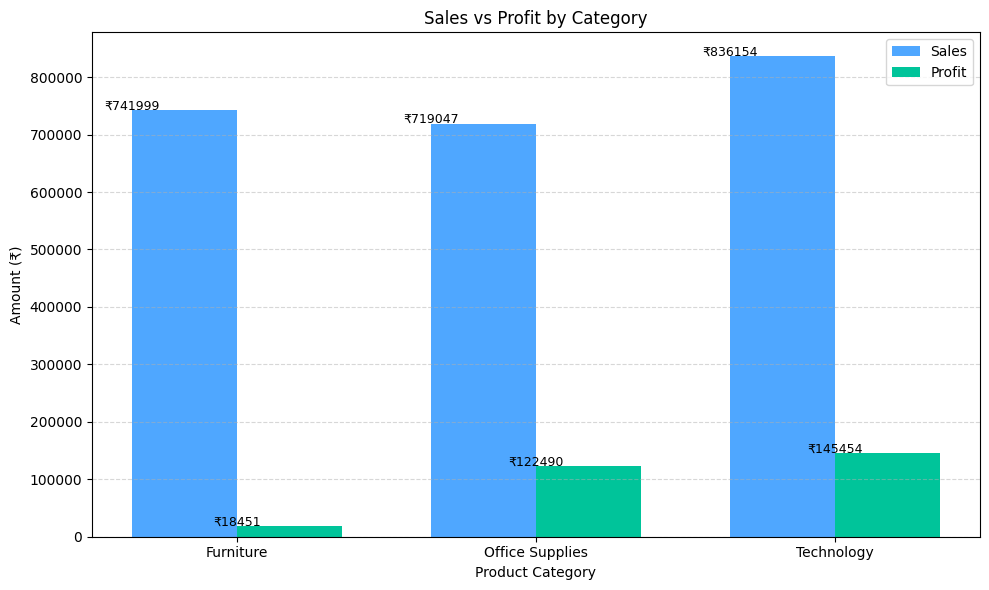

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Group data by category
category_summary = df.groupby('category')[['sales', 'profit']].sum().reset_index()

# Step 2: Plotting grouped bars
x = np.arange(len(category_summary))  # X locations
width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, category_summary['sales'], width, label='Sales', color='#4fa7ff')
bars2 = plt.bar(x + width/2, category_summary['profit'], width, label='Profit', color='#00c49a')

# Step 3: Add labels
plt.xlabel('Product Category')
plt.ylabel('Amount (₹)')
plt.title('Sales vs Profit by Category')
plt.xticks(x, category_summary['category'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Step 4: Add value labels on top of bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - width/2, yval + 1000, f'₹{int(yval)}', ha='center', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - width/2, yval + 1000, f'₹{int(yval)}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [26]:
df['category'].unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

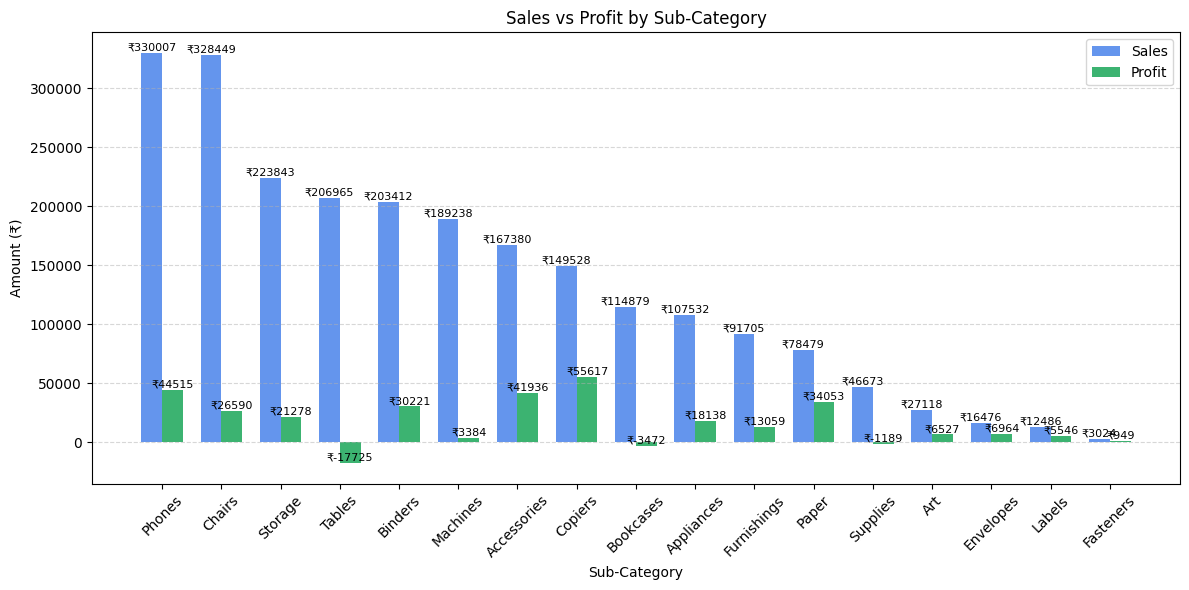

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by sub-category and sum sales and profit
subcat_summary = df.groupby('sub-category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)

# Plot grouped bar chart
x = np.arange(len(subcat_summary))  # X-axis positions
width = 0.35  # Width of bars

plt.figure(figsize=(12, 6))
bar1 = plt.bar(x - width/2, subcat_summary['sales'], width, label='Sales', color='cornflowerblue')
bar2 = plt.bar(x + width/2, subcat_summary['profit'], width, label='Profit', color='mediumseagreen')

# Labels and title
plt.title('Sales vs Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Amount (₹)')
plt.xticks(x, subcat_summary.index, rotation=45)
plt.legend()

# Add values on top of bars
for i in range(len(subcat_summary)):
    plt.text(x[i] - width/2, subcat_summary['sales'].iloc[i] + 2000, f"₹{int(subcat_summary['sales'].iloc[i])}", ha='center', fontsize=8)
    plt.text(x[i] + width/2, subcat_summary['profit'].iloc[i] + 2000, f"₹{int(subcat_summary['profit'].iloc[i])}", ha='center', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


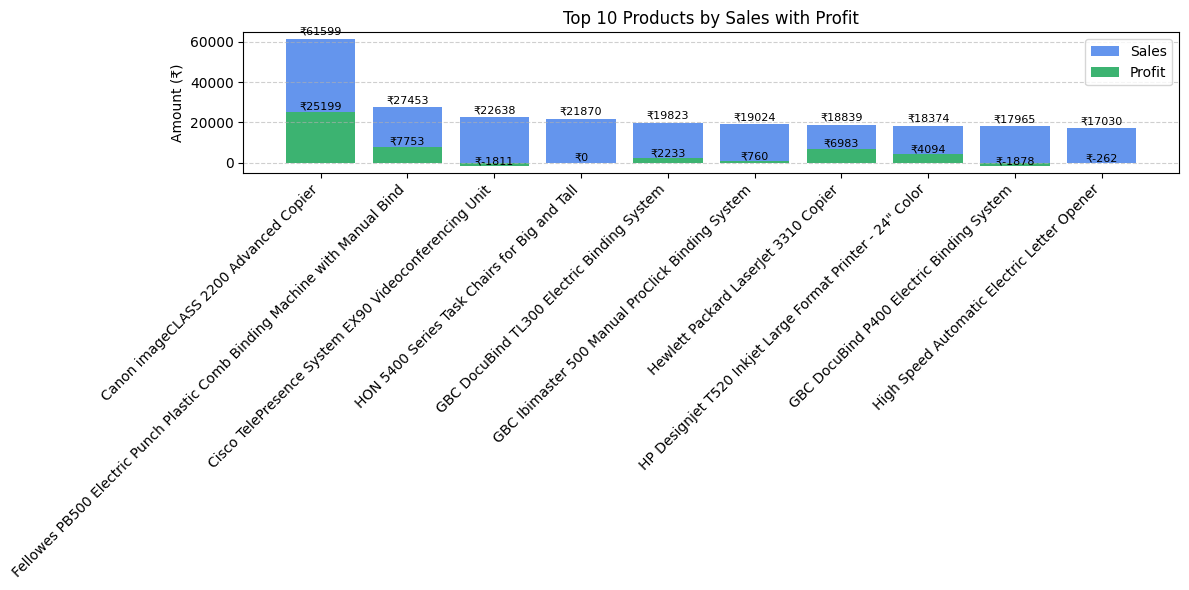

In [32]:
# Group by product name and calculate total sales and profit
top_products = df.groupby('product_name')[['sales', 'profit']].sum()

# Get Top 10 by Sales
top_10_sales = top_products.sort_values(by='sales', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
bars1 = plt.bar(top_10_sales.index, top_10_sales['sales'], label='Sales', color='cornflowerblue')
bars2 = plt.bar(top_10_sales.index, top_10_sales['profit'], label='Profit', color='mediumseagreen')

plt.title('Top 10 Products by Sales with Profit')
plt.ylabel('Amount (₹)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels
for i, name in enumerate(top_10_sales.index):
    plt.text(i, top_10_sales['sales'].iloc[i] + 2000, f"₹{int(top_10_sales['sales'].iloc[i])}", ha='center', fontsize=8)
    plt.text(i, top_10_sales['profit'].iloc[i] + 1000, f"₹{int(top_10_sales['profit'].iloc[i])}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()


In [31]:
df['region'] = df['region'].replace({
    'South-East Zone': 'SE Zone',
    'North-West Zone': 'NW Zone',
    # add others...
})


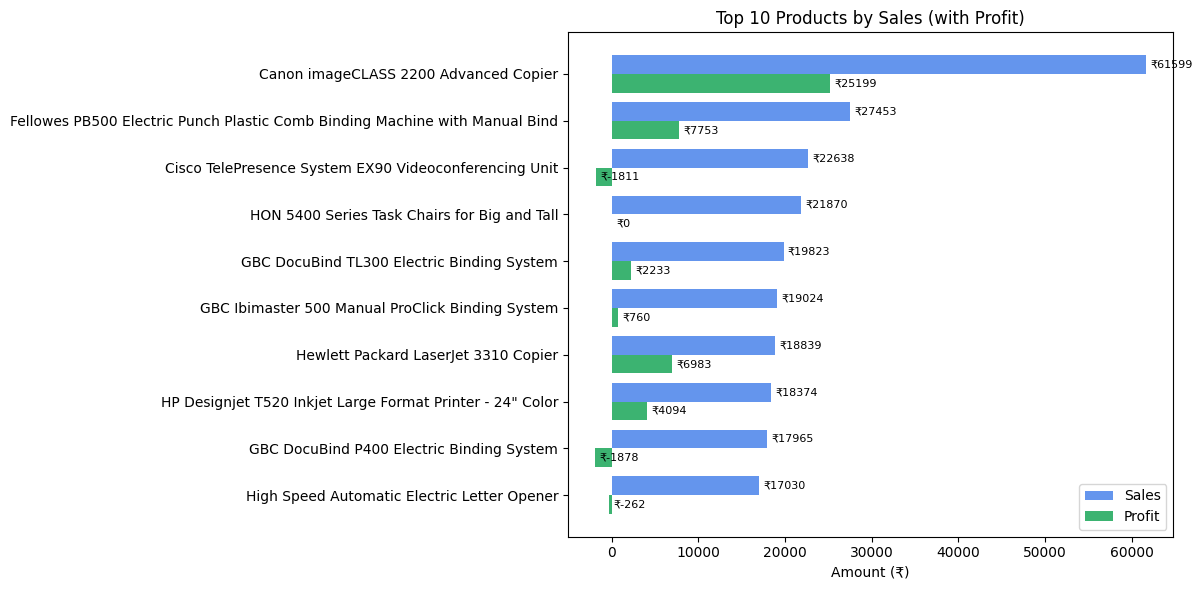

In [34]:
# Get least profitable top 10 products
bottom_products = df.groupby('product_name')[['sales', 'profit']].sum().sort_values(by='profit').head(10)

# Plot similar to previous horizontal bar chart
# Just replace `top_products` with `bottom_products`


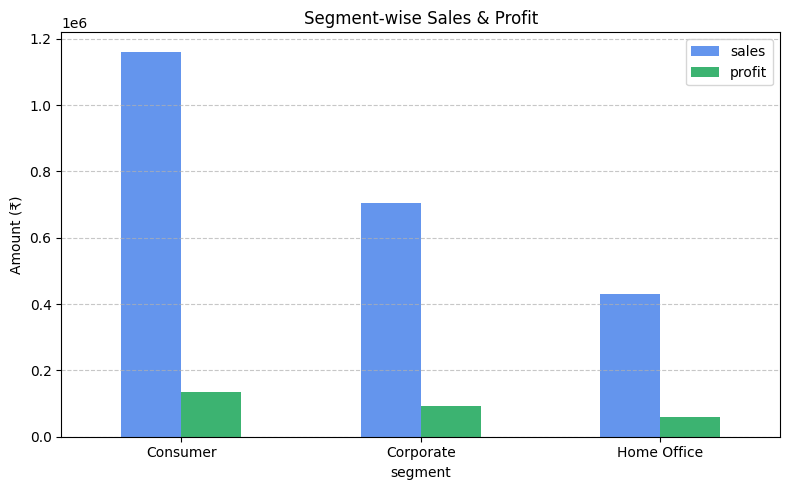

In [35]:
segment_df = df.groupby('segment')[['sales', 'profit']].sum()

segment_df.plot(kind='bar', figsize=(8,5), color=['cornflowerblue', 'mediumseagreen'])
plt.title('Segment-wise Sales & Profit')
plt.ylabel('Amount (₹)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


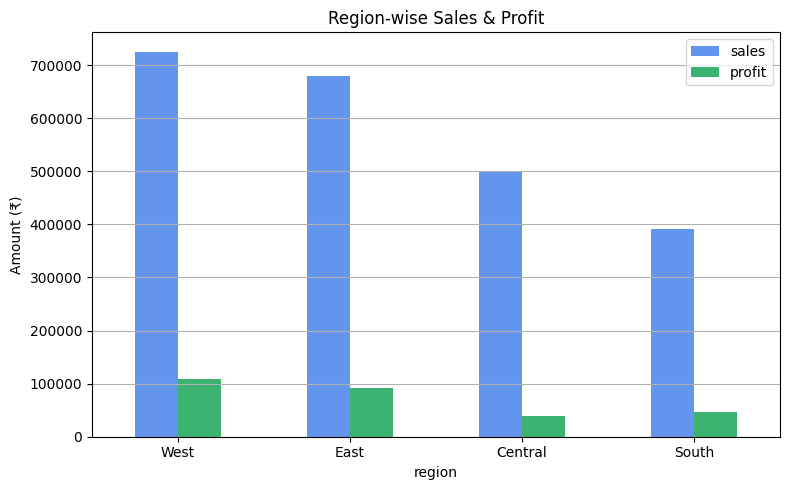

In [36]:
region_df = df.groupby('region')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)
region_df.plot(kind='bar', figsize=(8,5), color=['cornflowerblue', 'mediumseagreen'])
plt.title('Region-wise Sales & Profit')
plt.ylabel('Amount (₹)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


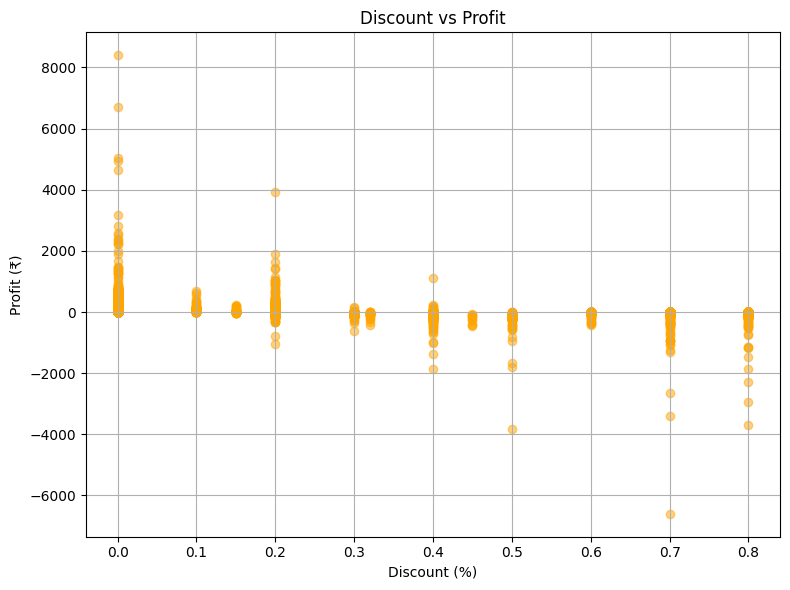

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(df['discount'], df['profit'], alpha=0.5, color='orange')
plt.title('Discount vs Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Profit (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()
